In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import anndata

from sklearn import decomposition, manifold
import umap

In [24]:
df = pd.read_csv("data/anon.csv")
df = df.dropna()

In [25]:
adata = anndata.AnnData(df.iloc[:, 2:].values.astype(np.float32), obs=df.iloc[:, :2])
adata.var.index = df.columns[2:]
adata.obs["vaalipiiri"] = adata.obs["vaalipiiri"].astype("category")
adata.obs["puolue"] = adata.obs["puolue"].astype("category")
adata


/home/lutrarutra/.pyenv/versions/3.10.9/envs/lst/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2115 × 47
    obs: 'vaalipiiri', 'puolue'

In [26]:
pca = decomposition.PCA(n_components=10)
pca.fit(adata.X)
adata.obsm["X_pca"] = pca.transform(adata.X)

In [27]:
tsne = manifold.TSNE(n_components=2)
adata.obsm["X_tsne"] = tsne.fit_transform(adata.X)

In [28]:
adata.X.shape

(2115, 47)

In [29]:
def explain_corr(adata, label, key="X_pca", figsize=(8, 8), dpi=80, path=None):
    corr = []
    n_components = adata.obsm[key].shape[1]
    for i in range(n_components):
        corr.append(np.corrcoef(adata.obsm[key][:, i], adata.obs[label].cat.codes)[0,1])

    f, ax = plt.subplots(figsize=figsize, dpi=dpi)
    sns.barplot(
        x=np.arange(0, n_components),
        y=corr,
    )
    plt.title(f"{label.title()} x PCA component correlation")
    if path:
        plt.savefig(path, bbox_inches="tight")
    plt.show()

In [30]:
def projection(adata, color, key="X_pca", components=(0,1), figsize=(8, 8), dpi=80, path=None):
    f, ax = plt.subplots(figsize=figsize, dpi=dpi)
    sns.scatterplot(
        x=adata.obsm[key][:, components[0]],
        y=adata.obsm[key][:, components[1]],
        hue=adata.obs[color],
        palette="tab20",
        ax=ax
    )
    if key == "X_pca":
        label = "PCA"
    elif key == "X_tsne":
        label = "t-SNE"
    else:
        label = key
    
    ax.set_xlabel(f"{label} {components[0]+1}")
    ax.set_ylabel(f"{label} {components[1]+1}")
    plt.legend(loc=(1.04, 0.05))
    if path:
        plt.savefig(path, bbox_inches="tight")
    plt.show()

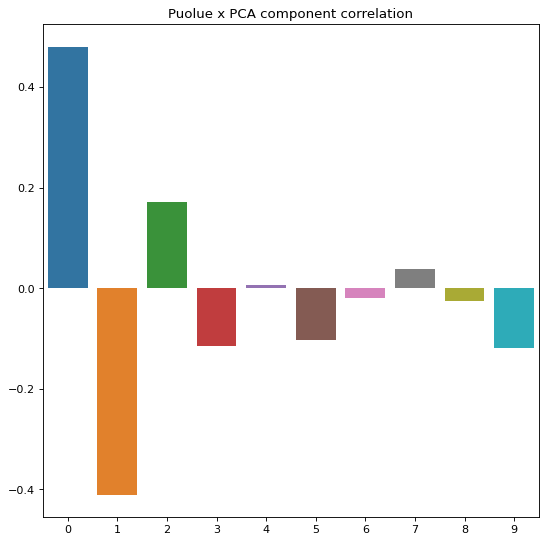

In [31]:
explain_corr(adata, "puolue", path="figures/puolue_corr.png")

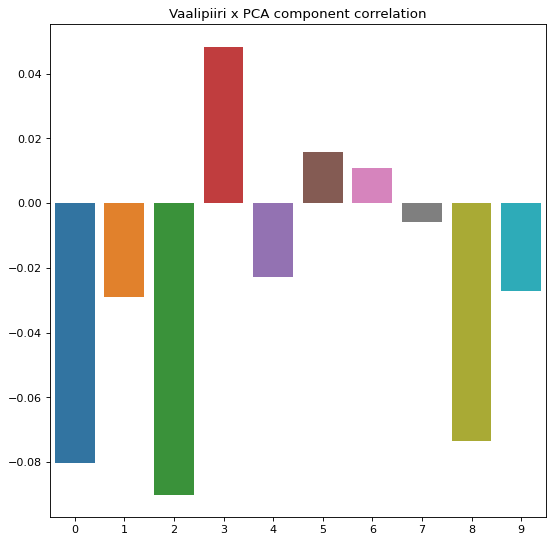

In [32]:
explain_corr(adata, "vaalipiiri", path="figures/vaalipiiri_corr.png")

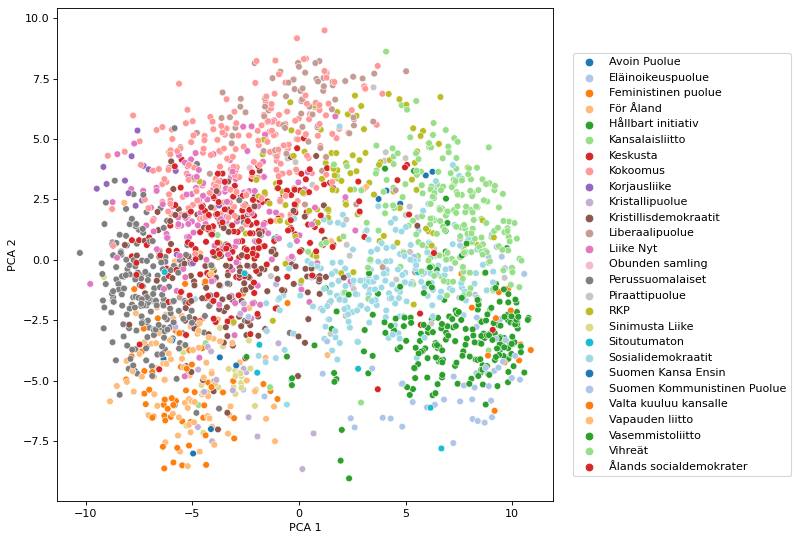

In [33]:
projection(adata, "puolue", components=(0, 1), path="figures/puolue_pca.png")

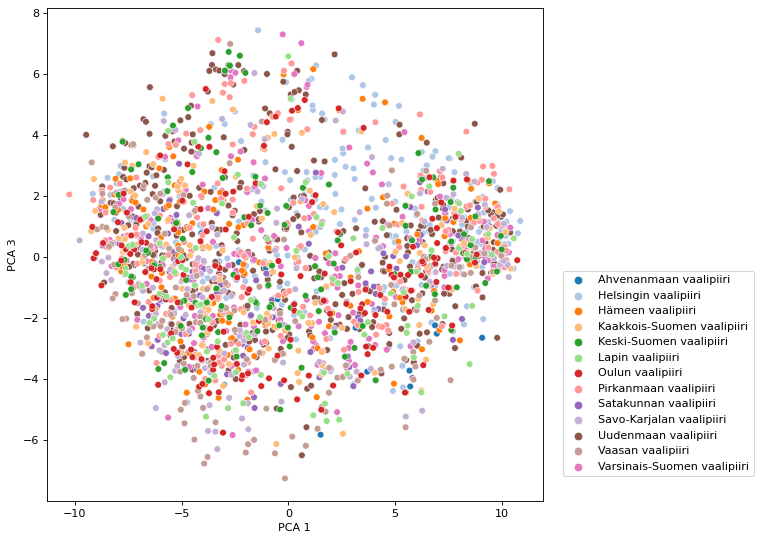

In [34]:
projection(adata, "vaalipiiri", components=(0, 2), path="figures/vaalipiiri_pca.png")

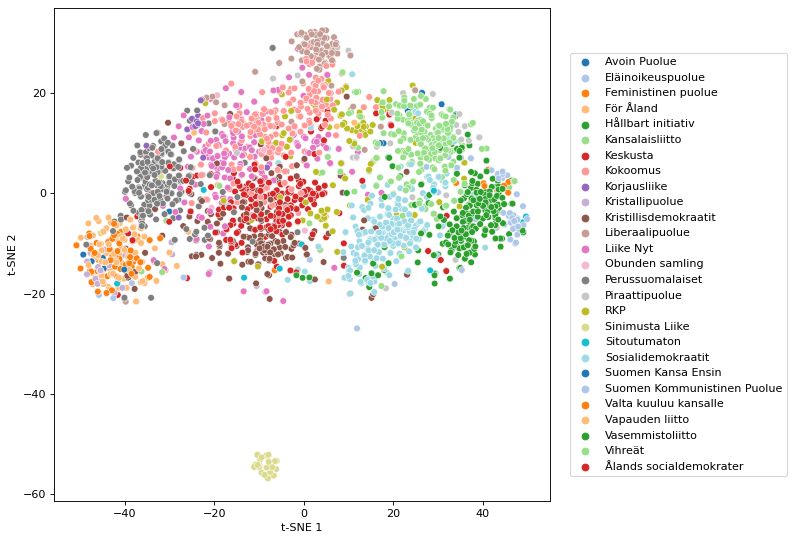

In [35]:
projection(adata, "puolue", key="X_tsne", path="figures/puolue_tsne.png")

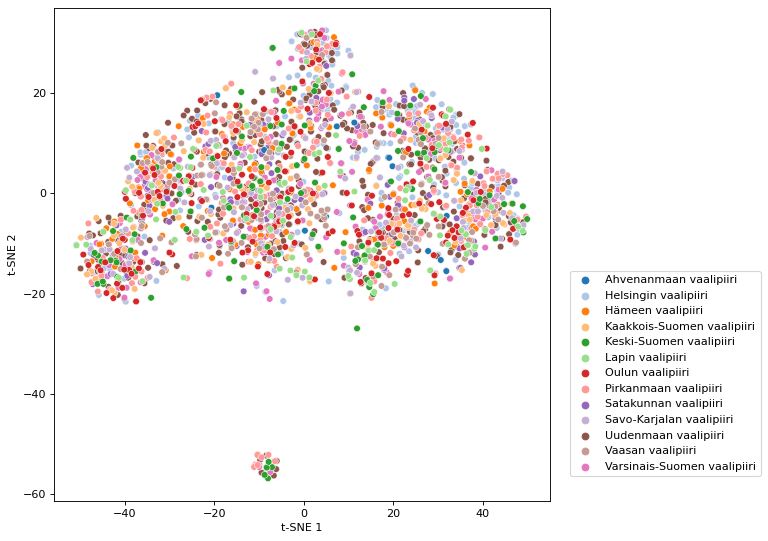

In [36]:
projection(adata, "vaalipiiri", key="X_tsne", path="figures/vaalipiiri_tsne.png")